In [6]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [8]:
# Download the "en_core_web_sm" model
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
NER=spacy.load('en_core_web_sm')


In [3]:
!python3 -m sapcy download en_core_web_sm

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


### Load Books

In [10]:
import os

# Get all book files in the data directory
all_books=[b for b in os.scandir('data') if '.txt' in b.name]

In [11]:
all_books

[<DirEntry '01-Adi Parva (The Book of the Beginning).txt'>,
 <DirEntry '02-Sabha Parva (The Book of the Assembly Hall).txt'>,
 <DirEntry '03-Vana Parva also Aranyaka-parva, Aranya-parva (The Book of the Forest).txt'>,
 <DirEntry '04-Virata Parva (The Book of Virata).txt'>,
 <DirEntry '05-Udyoga Parva (The Book of the Effort).txt'>,
 <DirEntry '06-Bhishma Parva (The Book of Bhishma).txt'>,
 <DirEntry '07-Drona Parva (The Book of Drona).txt'>,
 <DirEntry '08-Karna Parva (The Book of Karna).txt'>,
 <DirEntry '09-Shalya Parva (The Book of Shalya).txt'>,
 <DirEntry '10-Sauptika Parva (The Book of the Sleeping Warriors).txt'>,
 <DirEntry '11-Stri Parva (The Book of the Women).txt'>,
 <DirEntry '12-Shanti Parva (The Book of Peace).txt'>,
 <DirEntry '13-Anushasana Parva (The Book of the Instructions).txt'>,
 <DirEntry '14-Ashvamedhika Parva (The Book of the Horse Sacrifice).txt'>,
 <DirEntry '15-Ashramavasika Parva (The Book of the Hermitage).txt'>,
 <DirEntry '16-Mausala Parva (The Book of th

NameError: name 'text' is not defined

In [16]:
book=all_books[2]
book_text=open(book).read()
book_doc=NER(book_text)
nlp.max_length = 40000000

ValueError: [E088] Text of length 1886016 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [ ]:
#visualize identified entities
displacy.render (book_doc[0:2000],style="ent",jupyter=True)

## Load character names

In [35]:
## Read characters
character_df=pd.read_csv("characters.csv")

In [36]:
print(character_df)

                                                  Book  \
0                Adi Parva (The Book of the Beginning)   
1                Adi Parva (The Book of the Beginning)   
2                Adi Parva (The Book of the Beginning)   
3                Adi Parva (The Book of the Beginning)   
4                Adi Parva (The Book of the Beginning)   
5                Adi Parva (The Book of the Beginning)   
6                Adi Parva (The Book of the Beginning)   
7                Adi Parva (The Book of the Beginning)   
8                Adi Parva (The Book of the Beginning)   
9                Adi Parva (The Book of the Beginning)   
10               Adi Parva (The Book of the Beginning)   
11               Adi Parva (The Book of the Beginning)   
12               Adi Parva (The Book of the Beginning)   
13               Adi Parva (The Book of the Beginning)   
14               Adi Parva (The Book of the Beginning)   
15               Adi Parva (The Book of the Beginning)   
16            

In [37]:
# Remove brackets and text within brackets 
import re
character_df['character']=character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","",x))
#character_df['character_firstname']=character_df['character'].apply(lambda x: x.split(' ',1)[0])

In [38]:
pd.set_option('display.max_rows',None)
character_df

,Book,character
0,Adi Parva (The Book of the Beginning),Yudhishthira
1,Adi Parva (The Book of the Beginning),Bhima
2,Adi Parva (The Book of the Beginning),Arjuna
3,Adi Parva (The Book of the Beginning),Nakula
4,Adi Parva (The Book of the Beginning),Sahadeva
5,Adi Parva (The Book of the Beginning),Draupadi
6,Adi Parva (The Book of the Beginning),Duryodhana
7,Adi Parva (The Book of the Beginning),Karna
8,Adi Parva (The Book of the Beginning),Bhishma
9,Adi Parva (The Book of the Beginning),Dronacharya


## Get named entity list per sentecne

In [61]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [62]:
sent_entity_df

,sentence,entities
0,"(The, Mahabharata, \n\n, of, \n\n, Krishna, -,...","[Mahabharata, 2, English Prose, the Original S..."
1,"(Proofed, at, Distributed, Proofing, ,, \n, Ju...","[Distributed Proofing, Juliet Sutherland]"
2,"(Additional, proofing, and, formatting, at, \n...","[J. B. Hare, Sabhakriya Parva]"
3,"(Om, !)",[]
4,"(After, having, bowed, down, to, Narayana, ,, ...","[Narayana, Nara, Saraswati, Jaya, Vaisampayana..."
...,...,...
3415,"(And, it, thou, actest, in, this, way, ,, \n, ...",[]
3416,"(It, was, thus, ,, O, son, of, \n, Gavalgani, ...","[Gavalgani, Vidura]"
3417,"(And, I, did, not, accept, this, counsel, ,, m...",[]
3418,"("", \n\n, The, End, of, Sabha, Parva, \n\n, FO...","[Sabha Parva, 1]"


In [94]:
#sent_entity_df['character_entities']

In [109]:
## Only use one name to refering a person to make analysis consistent
sent_entity_df['entities'] = sent_entity_df['entities'].apply(lambda entities: ['Krishna' if entity in ['Vasudeva', 'Kesava'] else entity for entity in entities])
sent_entity_df['entities'] = sent_entity_df['entities'].apply(lambda entities: ['Arjuna' if entity in [ 'Partha' ]  else entity for entity in entities])

In [110]:
sent_entity_df['entities']

0       [Mahabharata, 2, English Prose, the Original S...
1               [Distributed Proofing, Juliet Sutherland]
2                          [J. B. Hare, Sabhakriya Parva]
3                                                      []
4       [Narayana, Nara, Saraswati, Jaya, Vaisampayana...
                              ...                        
3415                                                   []
3416                                  [Gavalgani, Vidura]
3417                                                   []
3418                                     [Sabha Parva, 1]
3419                                                   []
Name: entities, Length: 3420, dtype: object

In [111]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character)] 
            #or ent in list(character_df.character_firstname)]

In [112]:
filter_entity(["Krishna", "she", "1"], character_df)

['Krishna']

In [113]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(100)

,sentence,entities,character_entities
4,"(After, having, bowed, down, to, Narayana, ,, ...","[Narayana, Nara, Saraswati, Jaya, Vaisampayana...","[Krishna, Arjuna, Kunti, Krishna]"
6,"("", Arjuna, said,--'O, great, Asura, ,, everyt...","[Arjuna, Asura]",[Arjuna]
13,"("", Arjuna, said,--'O, sinless, one, ,, thou, ...",[Arjuna],[Arjuna]
16,"(Do, thou, something, for, Krishna, .)",[Krishna],[Krishna]
18,"(Vaisampayana, said,--""Then, ,, O, bull, of, t...","[Vaisampayana, Bharata, Maya, Krishna, Maya]","[Bharata, Krishna]"
...,...,...,...
365,"(And, \n, Vasuki, and, Takshaka, ,, and, the, ...","[Takshaka, Naga, Airavana, Krishna, Lohita, Pa...","[Krishna, Dhritarashtra]"
366,"(O, \n, Yudhishthira, ,, without, anxiety, of,...","[Yudhishthira, Varuna]",[Yudhishthira]
370,"(And, \n, various, tribes, of, Gandharvas, and...","[Gandharvas, Apsaras, Varuna]",[Gandharvas]
374,"(O, bull, of, \n, the, Bharata, race, ,, such,...","[Bharata, Varuna]",[Bharata]


In [114]:
sent_entity_df_filtered

,sentence,entities,character_entities
4,"(After, having, bowed, down, to, Narayana, ,, ...","[Narayana, Nara, Saraswati, Jaya, Vaisampayana...","[Krishna, Arjuna, Kunti, Krishna]"
6,"("", Arjuna, said,--'O, great, Asura, ,, everyt...","[Arjuna, Asura]",[Arjuna]
13,"("", Arjuna, said,--'O, sinless, one, ,, thou, ...",[Arjuna],[Arjuna]
16,"(Do, thou, something, for, Krishna, .)",[Krishna],[Krishna]
18,"(Vaisampayana, said,--""Then, ,, O, bull, of, t...","[Vaisampayana, Bharata, Maya, Krishna, Maya]","[Bharata, Krishna]"
...,...,...,...
3408,"(And, that, mighty, warrior, amongst, them, ,,...","[Bhimasena, Yama]",[Yama]
3409,"(These, kings, will, scarcely, be, able, to, b...",[Bhima],[Bhima]
3412,"(Thou, knowest, ,, O, king, ,, \n, that, the, ...","[Thou knowest, Jarasandha, Bhima]",[Bhima]
3413,"(Therefore, ,, O, bull, of, the, Bharata, race...","[Bharata, behoveth, Pandu]",[Bharata]


In [121]:
sent_entity_df_filtered['sentence'][3416]

It was thus, O son of
Gavalgani, that Vidura addressed me in words of both virtue and profit.

In [122]:
sent_entity_df_filtered['sentence'][3413]

Therefore, O bull of the Bharata race, it
behoveth thee to make peace with the sons of Pandu.

In [58]:
## Only use one name to refering a person to make analysis consistent

In [107]:
#sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['entities'].apply(lambda x: [entity if entity != 'Narayana' else 'Krishna' for entity in x])
#sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['entities'].apply(lambda x: [entity if entity != 'Vasudeva' else 'Krishna' for entity in x])
#sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['entities'].apply(lambda x: [entity if entity != 'Kesava' else 'Krishna' for entity in x])
#sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['entities'].apply(lambda x: [entity if entity != 'Partha' else 'Arjuna' for entity in x])
#sent_entity_df_filtered2 = sent_entity_df_filtered[sent_entity_df_filtered['character_entities'].map(len) > 0]
#sent_entity_df_filtered2.head(100)

In [108]:

#sent_entity_df_filtered2

## Show relationships

In [123]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [124]:
relationship_df = pd.DataFrame(relationships)

In [125]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Krishna,Arjuna
1,Arjuna,Kunti
2,Kunti,Krishna
3,Krishna,Arjuna
4,Arjuna,Kunti
5,Kunti,Krishna
6,Krishna,Arjuna
7,Krishna,Arjuna
8,Arjuna,Kunti
9,Kunti,Krishna


In [ ]:
# to tackle reverse order relationship i.e krishna-> arjuna and arjuna->Krishna

In [126]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Arjuna,Krishna
1,Arjuna,Kunti
2,Krishna,Kunti
3,Arjuna,Krishna
4,Arjuna,Kunti
5,Krishna,Kunti
6,Arjuna,Krishna
7,Arjuna,Krishna
8,Arjuna,Kunti
9,Krishna,Kunti


In [127]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [128]:
relationship_df.head(10)

,source,target,value
0,Arjuna,Krishna,184
1,Arjuna,Kunti,32
2,Krishna,Kunti,39
3,Bharata,Krishna,83
4,Krishna,Yudhishthira,203
5,Arjuna,Yudhishthira,115
6,Bharata,Yudhishthira,70
7,Kunti,Yudhishthira,118
8,Krishna,Subhadra,8
9,Draupadi,Subhadra,16


## Graphs Analysis and Visualizaion

In [131]:
# Creating graph from a pandas df
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Networkx(Graph Visualization)

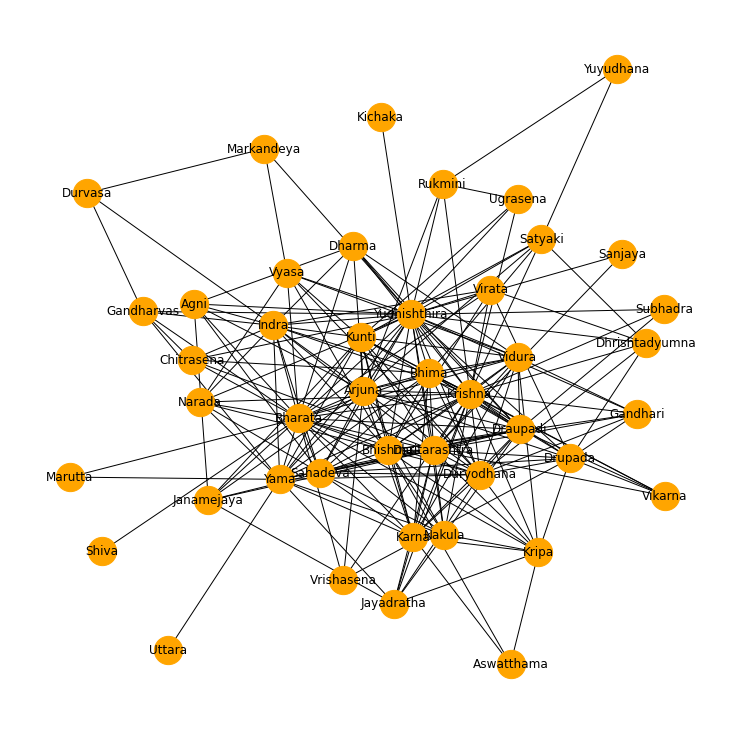

In [153]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='orange',node_size=800, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
# The graph made by Networkx is very static and hard to read therefore it is better to use pyvis to level up the graph

In [154]:
### Pyvis(Graph visualization)

In [159]:
pip install pyvis

     -------------------------------------- 756.0/756.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 40.7/40.7 kB 982.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [175]:
from pyvis.network import Network
net = Network(notebook = True, width="2000px", height="900px", bgcolor='#222221', font_color='orange')
net.repulsion()
node_degree = dict(G.degree)
#G.show_buttons(filter_=['physics']) 

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("Mahabharat(Vol1).html")


Mahabharat(Vol1).html


In [176]:
#!pip list

## Mahabharat's Important character

In [178]:
## Volume 1

In [177]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Arjuna': 0.46511627906976744,
 'Krishna': 0.6744186046511628,
 'Kunti': 0.3953488372093023,
 'Bharata': 0.627906976744186,
 'Yudhishthira': 0.7209302325581395,
 'Subhadra': 0.06976744186046512,
 'Draupadi': 0.3953488372093023,
 'Nakula': 0.2558139534883721,
 'Sahadeva': 0.37209302325581395,
 'Bhima': 0.41860465116279066,
 'Indra': 0.3953488372093023,
 'Satyaki': 0.16279069767441862,
 'Ugrasena': 0.09302325581395349,
 'Rukmini': 0.11627906976744186,
 'Yama': 0.3953488372093023,
 'Agni': 0.16279069767441862,
 'Dharma': 0.18604651162790697,
 'Vyasa': 0.18604651162790697,
 'Markandeya': 0.06976744186046512,
 'Yuyudhana': 0.046511627906976744,
 'Gandharvas': 0.13953488372093023,
 'Narada': 0.18604651162790697,
 'Durvasa': 0.06976744186046512,
 'Chitrasena': 0.13953488372093023,
 'Marutta': 0.046511627906976744,
 'Vrishasena': 0.09302325581395349,
 'Janamejaya': 0.16279069767441862,
 'Dhritarashtra': 0.5116279069767442,
 'Jayadratha': 0.18604651162790697,
 'Shiva': 0.023255813953488372,
 '

<AxesSubplot:>

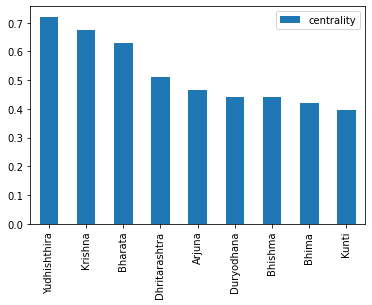

In [179]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

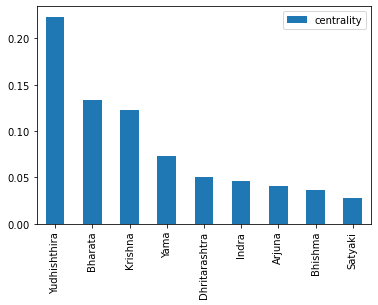

In [180]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

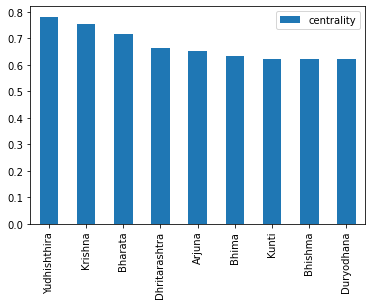

In [181]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [183]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

## Communities detection

In [184]:
pip install python-louvain


     -------------------------------------- 204.6/204.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9414 sha256=36783849a9434e28484af0c348c86cd4b1e5af15bd9c8736e43d6e4452165233
  Stored in directory: c:\users\jatin\appdata\local\pip\cache\wheels\4d\7c\b6\79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain


In [185]:
import community as community_louvain

In [186]:
communities = community_louvain.best_partition(G)

In [187]:
communities

{'Arjuna': 0,
 'Krishna': 3,
 'Kunti': 3,
 'Bharata': 0,
 'Yudhishthira': 3,
 'Subhadra': 3,
 'Draupadi': 1,
 'Nakula': 1,
 'Sahadeva': 0,
 'Bhima': 1,
 'Indra': 0,
 'Satyaki': 3,
 'Ugrasena': 3,
 'Rukmini': 3,
 'Yama': 2,
 'Agni': 0,
 'Dharma': 0,
 'Vyasa': 0,
 'Markandeya': 0,
 'Yuyudhana': 3,
 'Gandharvas': 0,
 'Narada': 0,
 'Durvasa': 0,
 'Chitrasena': 0,
 'Marutta': 2,
 'Vrishasena': 0,
 'Janamejaya': 0,
 'Dhritarashtra': 1,
 'Jayadratha': 1,
 'Shiva': 0,
 'Uttara': 2,
 'Karna': 1,
 'Bhishma': 1,
 'Vidura': 1,
 'Kripa': 1,
 'Aswatthama': 1,
 'Virata': 3,
 'Drupada': 1,
 'Dhrishtadyumna': 3,
 'Duryodhana': 1,
 'Gandhari': 1,
 'Kichaka': 3,
 'Vikarna': 1,
 'Sanjaya': 3}

In [188]:
nx.set_node_attributes(G, communities, 'group')

In [190]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.repulsion()
com_net.from_nx(G)
com_net.show("Mahabharat(Vol1).html")

Mahabharat(Vol1).html
